# Dimensionality Reduction

- The *curse of dimensionality* refers to the fact that many ML problems involve thousands or even millions of features. This makes training extremely slow, and sometimes makes it very difficult to find a good solution.
- In real world problems, it is often possible to reduce the number of features considerably.
    - For example, with the MNIST images, the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information.
    - Additionally, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g. by taking the mean of the two pixel intensities), you will not lose much information.

***Reducing dimensionality does cause some information loss, just like compressing an image to JPEG can degrade its quality, so even though it will speed up training, it may make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. Therefore, I recommend you first try to train your system with the original data before considering using dimensionality reduction. In some cases, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance, but in general it won't: it will just speed up training.***

- Dimensionality reduction is also extremely useful for data visualization. 
- Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and gain some important insights by visually detecting patterns, such as clusters.
- Moreover, data visualization is essential to communicate your conclusions to people who are not data scientists.

### The Curse of Dimensionality
- Many things behave differently in high-dimensional space.
- High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.
- This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations.
- **In short, the more dimensions the training set has, the greater the risk of overfitting it.**
- In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.
    - Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions.

### Main Approaches to Dimensionality Reduction
#### Projection
- In most real-world problems, training instances are *not* spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated.
- As a result, all training instances lie within (or close to) a much lower-dimensional *subspace* of the high-dimensional space.
- Conceptually: Projection is "casting" high-dimensional data onto a lower-dimensional surface — like casting a 3D shadow onto a 2D wall.
- Explanation:
    - Lets say we have a bunch of points in **3D space**:
    $$
    (x_1, y_1, z_1) \\
    (x_2, y_2, z_2)
    $$
    - Now imagine we pick a **2D plane** floating through 3D space - not necessarily aligned with XY, YZ or XZ planes. It could be titled at any angle.
    - **Projection**:
        - You then project each 3D point onto that 2D plane - like dropping a perpendicular from the 3D point onto the plane.
        - The point where it lands on the plane is the **projection**.
    - Once all your 3D points have been projected onto this 2D plane, you can flatten the plane and describe each point by 2 coordinates in this new 2D space.
        

#### Manifold Learning
- Projection is not always the best approach to dimensionality reduction.
- In many cases, the subspace may twist and turn, such as in the famous Swiss roll toy dataset.
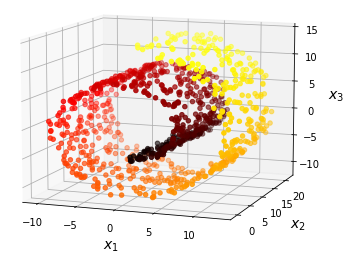
- Simply projecting onto a plane (e.g. by dropping $x_3$) would squash different layers of the Swiss roll together:

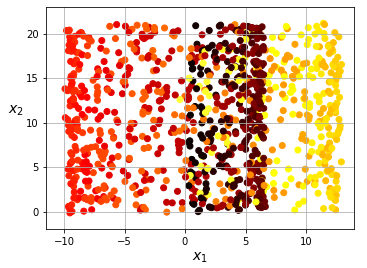

- What you probably want instead is to unroll the the swiss roll to obtain the dataset below:

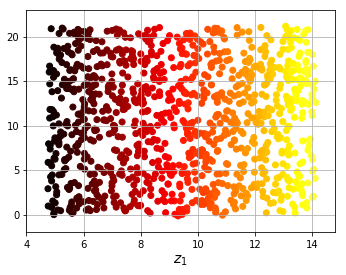

- The Swiss roll is an example of a 2D *manifold*.
- Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher dimensional space.
- More generally, a *d*-dimensional manifold is a part of an *n*-dimensional space (where $d$ < $n$) that locally resembles a $d$-dimensional hyperplane.
- In the case of the Swiss roll, $d = 2$ and $n = 3$: it locally resembles a 2D plane, but it is rolled in 3D.

- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called *manifold learning*. 
- It relies on the *manifold assumption*, also called the *manifold hypothesis*, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. 
- This assumption is very often empirically observed.